# GANUNET5
## inference using transfer learned ESRGAN+UNET5

# Dependencies

In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from ISR.models import RRDN
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from tifffile import imsave
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE
from csbdeep.utils import normalize
from tqdm import tqdm

In [1]:
# !pip install h5py==2.10.0 --force-reinstall

In [2]:
os.path.abspath(os.getcwd())

'D:\\BOX\\Box sync\\RA\\codes\\Imaging\\SR\\GANUNET5-main\\GANUNET5'

## GPU implementation (optional)

In [5]:
tf.test.gpu_device_name()

''

# Load trained weights

In [3]:
rrdn = RRDN(arch_params={'C': 4, 'D':3, 'G':32, 'G0':32, 'T': 10, 'x':4})
rrdn.model.load_weights('rrdn-C4-D3-G32-G032-T10-x4_best-val_generator_loss_epoch051.hdf5')
model = CARE(config=None, name='400s_40ep_0.5n', basedir='')

# GANUNET Restoration from trained weights

### load .png format; restore and then save to .png format
### define input directory with 'ddir', output images will be saved to ddir/SR

In [24]:
ddir = ''
filelist = os.listdir(ddir)
for i in tqdm(filelist):
    if i.endswith(".png"):
        img = Image.open(ddir+ i)
        sr_img = rrdn.predict(np.array(img))
        sr_img = np.array(sr_img)[:,:,0]
        restored = model.predict(sr_img, axes='YX')
        restored = normalize8(restored)
        im = Image.fromarray(restored)
        im.save(os.path.join(ddir,'SR/') + i)

  0%|                                                                                          | 0/386 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


  0%|▏                                                                               | 1/386 [00:22<2:22:59, 22.29s/it]

1/1 [==============================] - 4s 4s/step


  1%|▍                                                                               | 2/386 [00:43<2:21:15, 22.07s/it]

1/1 [==============================] - 5s 5s/step


  1%|▌                                                                               | 3/386 [01:06<2:22:29, 22.32s/it]

1/1 [==============================] - 5s 5s/step


  1%|▊                                                                               | 4/386 [01:28<2:20:43, 22.10s/it]

1/1 [==============================] - 5s 5s/step


  1%|█                                                                               | 5/386 [01:49<2:18:39, 21.84s/it]

1/1 [==============================] - 4s 4s/step


  2%|█▏                                                                              | 6/386 [02:10<2:17:09, 21.66s/it]

1/1 [==============================] - 5s 5s/step


  2%|█▍                                                                              | 7/386 [02:32<2:16:44, 21.65s/it]

1/1 [==============================] - 4s 4s/step


  2%|█▋                                                                              | 8/386 [02:53<2:14:23, 21.33s/it]

1/1 [==============================] - 4s 4s/step


  2%|█▊                                                                              | 9/386 [03:13<2:12:55, 21.16s/it]

1/1 [==============================] - 4s 4s/step


  3%|██                                                                             | 10/386 [03:33<2:10:38, 20.85s/it]

1/1 [==============================] - 5s 5s/step


  3%|██▎                                                                            | 11/386 [03:54<2:10:03, 20.81s/it]

1/1 [==============================] - 4s 4s/step


  3%|██▍                                                                            | 12/386 [04:14<2:08:23, 20.60s/it]

1/1 [==============================] - 4s 4s/step


  3%|██▋                                                                            | 13/386 [04:35<2:07:36, 20.53s/it]

1/1 [==============================] - 4s 4s/step


  4%|██▊                                                                            | 14/386 [04:55<2:07:26, 20.56s/it]

1/1 [==============================] - 4s 4s/step


  4%|███                                                                            | 15/386 [05:16<2:06:59, 20.54s/it]

1/1 [==============================] - 4s 4s/step


  4%|███▎                                                                           | 16/386 [05:36<2:06:28, 20.51s/it]

1/1 [==============================] - 4s 4s/step


  4%|███▍                                                                           | 17/386 [05:57<2:06:21, 20.55s/it]

1/1 [==============================] - 4s 4s/step


  5%|███▋                                                                           | 18/386 [06:17<2:05:25, 20.45s/it]

1/1 [==============================] - 4s 4s/step


  5%|███▉                                                                           | 19/386 [06:38<2:05:35, 20.53s/it]

1/1 [==============================] - 4s 4s/step


  5%|████                                                                           | 20/386 [06:59<2:05:49, 20.63s/it]

1/1 [==============================] - 4s 4s/step


  5%|████▎                                                                          | 21/386 [07:20<2:07:44, 21.00s/it]

1/1 [==============================] - 4s 4s/step


  6%|████▌                                                                          | 22/386 [07:41<2:06:28, 20.85s/it]

1/1 [==============================] - 5s 5s/step


  6%|████▋                                                                          | 23/386 [08:02<2:06:54, 20.98s/it]

1/1 [==============================] - 5s 5s/step


  6%|████▉                                                                          | 24/386 [08:25<2:09:12, 21.42s/it]

1/1 [==============================] - 5s 5s/step


  6%|█████                                                                          | 25/386 [08:48<2:12:45, 22.07s/it]

1/1 [==============================] - 6s 6s/step


  7%|█████▎                                                                         | 26/386 [09:11<2:14:00, 22.33s/it]

1/1 [==============================] - 4s 4s/step


  7%|█████▌                                                                         | 27/386 [09:32<2:10:55, 21.88s/it]

1/1 [==============================] - 4s 4s/step


  7%|█████▋                                                                         | 28/386 [09:54<2:10:03, 21.80s/it]

1/1 [==============================] - 5s 5s/step


  8%|█████▉                                                                         | 29/386 [10:15<2:08:42, 21.63s/it]

1/1 [==============================] - 4s 4s/step


  8%|██████▏                                                                        | 30/386 [10:36<2:07:55, 21.56s/it]

1/1 [==============================] - 4s 4s/step


  8%|██████▎                                                                        | 31/386 [11:00<2:10:51, 22.12s/it]

1/1 [==============================] - 4s 4s/step


  8%|██████▌                                                                        | 32/386 [11:21<2:09:48, 22.00s/it]

1/1 [==============================] - 4s 4s/step


  9%|██████▊                                                                        | 33/386 [11:43<2:08:07, 21.78s/it]

1/1 [==============================] - 5s 5s/step


  9%|██████▉                                                                        | 34/386 [12:04<2:06:10, 21.51s/it]

1/1 [==============================] - 4s 4s/step


  9%|███████▏                                                                       | 35/386 [12:25<2:05:09, 21.39s/it]

1/1 [==============================] - 4s 4s/step


  9%|███████▎                                                                       | 36/386 [12:45<2:02:41, 21.03s/it]

1/1 [==============================] - 4s 4s/step


 10%|███████▌                                                                       | 37/386 [13:05<2:01:31, 20.89s/it]

1/1 [==============================] - 4s 4s/step


 10%|███████▊                                                                       | 38/386 [13:26<2:00:27, 20.77s/it]

1/1 [==============================] - 4s 4s/step


 10%|███████▉                                                                       | 39/386 [13:46<1:58:35, 20.51s/it]

1/1 [==============================] - 4s 4s/step


 10%|████████▏                                                                      | 40/386 [14:06<1:57:44, 20.42s/it]

1/1 [==============================] - 4s 4s/step


 11%|████████▍                                                                      | 41/386 [14:26<1:56:27, 20.25s/it]

1/1 [==============================] - 4s 4s/step


 11%|████████▌                                                                      | 42/386 [14:46<1:56:35, 20.34s/it]

1/1 [==============================] - 4s 4s/step


 11%|████████▊                                                                      | 43/386 [15:07<1:57:20, 20.53s/it]

1/1 [==============================] - 4s 4s/step


 11%|█████████                                                                      | 44/386 [15:28<1:57:33, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 12%|█████████▏                                                                     | 45/386 [15:49<1:57:20, 20.65s/it]

1/1 [==============================] - 4s 4s/step


 12%|█████████▍                                                                     | 46/386 [16:09<1:56:31, 20.56s/it]

1/1 [==============================] - 5s 5s/step


 12%|█████████▌                                                                     | 47/386 [16:30<1:56:33, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 12%|█████████▊                                                                     | 48/386 [16:51<1:56:10, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 13%|██████████                                                                     | 49/386 [17:11<1:55:58, 20.65s/it]

1/1 [==============================] - 4s 4s/step


 13%|██████████▏                                                                    | 50/386 [17:32<1:55:45, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 13%|██████████▍                                                                    | 51/386 [17:53<1:55:10, 20.63s/it]

1/1 [==============================] - 5s 5s/step


 13%|██████████▋                                                                    | 52/386 [18:14<1:56:02, 20.85s/it]

1/1 [==============================] - 4s 4s/step


 14%|██████████▊                                                                    | 53/386 [18:35<1:55:33, 20.82s/it]

1/1 [==============================] - 4s 4s/step


 14%|███████████                                                                    | 54/386 [18:55<1:54:18, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 14%|███████████▎                                                                   | 55/386 [19:15<1:53:36, 20.59s/it]

1/1 [==============================] - 4s 4s/step


 15%|███████████▍                                                                   | 56/386 [19:37<1:53:59, 20.73s/it]

1/1 [==============================] - 4s 4s/step


 15%|███████████▋                                                                   | 57/386 [19:57<1:53:21, 20.67s/it]

1/1 [==============================] - 5s 5s/step


 15%|███████████▊                                                                   | 58/386 [20:19<1:54:58, 21.03s/it]

1/1 [==============================] - 4s 4s/step


 15%|████████████                                                                   | 59/386 [20:40<1:53:55, 20.90s/it]

1/1 [==============================] - 4s 4s/step


 16%|████████████▎                                                                  | 60/386 [21:00<1:53:30, 20.89s/it]

1/1 [==============================] - 4s 4s/step


 16%|████████████▍                                                                  | 61/386 [21:21<1:52:44, 20.82s/it]

1/1 [==============================] - 4s 4s/step


 16%|████████████▋                                                                  | 62/386 [21:42<1:51:50, 20.71s/it]

1/1 [==============================] - 4s 4s/step


 16%|████████████▉                                                                  | 63/386 [22:02<1:51:16, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 17%|█████████████                                                                  | 64/386 [22:23<1:50:31, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 17%|█████████████▎                                                                 | 65/386 [22:43<1:50:30, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 17%|█████████████▌                                                                 | 66/386 [23:03<1:48:52, 20.41s/it]

1/1 [==============================] - 5s 5s/step


 17%|█████████████▋                                                                 | 67/386 [23:23<1:48:04, 20.33s/it]

1/1 [==============================] - 4s 4s/step


 18%|█████████████▉                                                                 | 68/386 [23:43<1:47:13, 20.23s/it]

1/1 [==============================] - 4s 4s/step


 18%|██████████████                                                                 | 69/386 [24:04<1:47:59, 20.44s/it]

1/1 [==============================] - 4s 4s/step


 18%|██████████████▎                                                                | 70/386 [24:25<1:48:16, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 18%|██████████████▌                                                                | 71/386 [24:45<1:47:37, 20.50s/it]

1/1 [==============================] - 4s 4s/step


 19%|██████████████▋                                                                | 72/386 [25:05<1:46:29, 20.35s/it]

1/1 [==============================] - 4s 4s/step


 19%|██████████████▉                                                                | 73/386 [25:26<1:46:46, 20.47s/it]

1/1 [==============================] - 4s 4s/step


 19%|███████████████▏                                                               | 74/386 [25:47<1:46:56, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 19%|███████████████▎                                                               | 75/386 [26:08<1:47:22, 20.72s/it]

1/1 [==============================] - 4s 4s/step


 20%|███████████████▌                                                               | 76/386 [26:29<1:46:52, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 20%|███████████████▊                                                               | 77/386 [26:49<1:46:03, 20.59s/it]

1/1 [==============================] - 4s 4s/step


 20%|███████████████▉                                                               | 78/386 [27:09<1:44:50, 20.42s/it]

1/1 [==============================] - 4s 4s/step


 20%|████████████████▏                                                              | 79/386 [27:29<1:43:30, 20.23s/it]

1/1 [==============================] - 4s 4s/step


 21%|████████████████▎                                                              | 80/386 [27:49<1:43:38, 20.32s/it]

1/1 [==============================] - 4s 4s/step


 21%|████████████████▌                                                              | 81/386 [28:10<1:43:54, 20.44s/it]

1/1 [==============================] - 5s 5s/step


 21%|████████████████▊                                                              | 82/386 [28:31<1:44:38, 20.65s/it]

1/1 [==============================] - 5s 5s/step


 22%|████████████████▉                                                              | 83/386 [28:52<1:44:29, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 22%|█████████████████▏                                                             | 84/386 [29:12<1:43:43, 20.61s/it]

1/1 [==============================] - 4s 4s/step


 22%|█████████████████▍                                                             | 85/386 [29:33<1:43:13, 20.58s/it]

1/1 [==============================] - 4s 4s/step


 22%|█████████████████▌                                                             | 86/386 [29:54<1:42:56, 20.59s/it]

1/1 [==============================] - 5s 5s/step


 23%|█████████████████▊                                                             | 87/386 [30:14<1:42:59, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 23%|██████████████████                                                             | 88/386 [30:35<1:42:28, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 23%|██████████████████▏                                                            | 89/386 [30:56<1:42:19, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 23%|██████████████████▍                                                            | 90/386 [31:16<1:41:35, 20.59s/it]

1/1 [==============================] - 4s 4s/step


 24%|██████████████████▌                                                            | 91/386 [31:37<1:41:45, 20.70s/it]

1/1 [==============================] - 4s 4s/step


 24%|██████████████████▊                                                            | 92/386 [31:58<1:41:02, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 24%|███████████████████                                                            | 93/386 [32:18<1:40:35, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 24%|███████████████████▏                                                           | 94/386 [32:38<1:39:50, 20.51s/it]

1/1 [==============================] - 4s 4s/step


 25%|███████████████████▍                                                           | 95/386 [32:59<1:39:22, 20.49s/it]

1/1 [==============================] - 4s 4s/step


 25%|███████████████████▋                                                           | 96/386 [33:19<1:38:43, 20.42s/it]

1/1 [==============================] - 4s 4s/step


 25%|███████████████████▊                                                           | 97/386 [33:39<1:38:16, 20.40s/it]

1/1 [==============================] - 4s 4s/step


 25%|████████████████████                                                           | 98/386 [34:00<1:38:06, 20.44s/it]

1/1 [==============================] - 4s 4s/step


 26%|████████████████████▎                                                          | 99/386 [34:20<1:37:33, 20.40s/it]

1/1 [==============================] - 4s 4s/step


 26%|████████████████████▏                                                         | 100/386 [34:41<1:37:11, 20.39s/it]

1/1 [==============================] - 4s 4s/step


 26%|████████████████████▍                                                         | 101/386 [35:01<1:37:06, 20.44s/it]

1/1 [==============================] - 4s 4s/step


 26%|████████████████████▌                                                         | 102/386 [35:22<1:36:57, 20.48s/it]

1/1 [==============================] - 4s 4s/step


 27%|████████████████████▊                                                         | 103/386 [35:42<1:36:31, 20.46s/it]

1/1 [==============================] - 4s 4s/step


 27%|█████████████████████                                                         | 104/386 [36:03<1:36:27, 20.52s/it]

1/1 [==============================] - 4s 4s/step


 27%|█████████████████████▏                                                        | 105/386 [36:23<1:36:12, 20.54s/it]

1/1 [==============================] - 5s 5s/step


 27%|█████████████████████▍                                                        | 106/386 [36:46<1:39:04, 21.23s/it]

1/1 [==============================] - 5s 5s/step


 28%|█████████████████████▌                                                        | 107/386 [37:08<1:39:37, 21.43s/it]

1/1 [==============================] - 4s 4s/step


 28%|█████████████████████▊                                                        | 108/386 [37:29<1:38:42, 21.30s/it]

1/1 [==============================] - 4s 4s/step


 28%|██████████████████████                                                        | 109/386 [37:50<1:37:17, 21.07s/it]

1/1 [==============================] - 4s 4s/step


 28%|██████████████████████▏                                                       | 110/386 [38:10<1:36:17, 20.93s/it]

1/1 [==============================] - 4s 4s/step


 29%|██████████████████████▍                                                       | 111/386 [38:30<1:34:26, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 29%|██████████████████████▋                                                       | 112/386 [38:50<1:33:22, 20.45s/it]

1/1 [==============================] - 4s 4s/step


 29%|██████████████████████▊                                                       | 113/386 [39:10<1:31:49, 20.18s/it]

1/1 [==============================] - 4s 4s/step


 30%|███████████████████████                                                       | 114/386 [39:30<1:31:04, 20.09s/it]

1/1 [==============================] - 4s 4s/step


 30%|███████████████████████▏                                                      | 115/386 [39:50<1:30:28, 20.03s/it]

1/1 [==============================] - 4s 4s/step


 30%|███████████████████████▍                                                      | 116/386 [40:10<1:30:37, 20.14s/it]

1/1 [==============================] - 5s 5s/step


 30%|███████████████████████▋                                                      | 117/386 [40:30<1:30:21, 20.15s/it]

1/1 [==============================] - 5s 5s/step


 31%|███████████████████████▊                                                      | 118/386 [40:51<1:30:40, 20.30s/it]

1/1 [==============================] - 4s 4s/step


 31%|████████████████████████                                                      | 119/386 [41:11<1:30:41, 20.38s/it]

1/1 [==============================] - 4s 4s/step


 31%|████████████████████████▏                                                     | 120/386 [41:32<1:30:35, 20.43s/it]

1/1 [==============================] - 4s 4s/step


 31%|████████████████████████▍                                                     | 121/386 [41:53<1:30:45, 20.55s/it]

1/1 [==============================] - 4s 4s/step


 32%|████████████████████████▋                                                     | 122/386 [42:15<1:32:05, 20.93s/it]

1/1 [==============================] - 5s 5s/step


 32%|████████████████████████▊                                                     | 123/386 [42:36<1:32:15, 21.05s/it]

1/1 [==============================] - 4s 4s/step


 32%|█████████████████████████                                                     | 124/386 [42:57<1:31:34, 20.97s/it]

1/1 [==============================] - 4s 4s/step


 32%|█████████████████████████▎                                                    | 125/386 [43:17<1:30:32, 20.81s/it]

1/1 [==============================] - 5s 5s/step


 33%|█████████████████████████▍                                                    | 126/386 [43:38<1:30:11, 20.81s/it]

1/1 [==============================] - 4s 4s/step


 33%|█████████████████████████▋                                                    | 127/386 [43:58<1:29:32, 20.74s/it]

1/1 [==============================] - 4s 4s/step


 33%|█████████████████████████▊                                                    | 128/386 [44:19<1:28:37, 20.61s/it]

1/1 [==============================] - 4s 4s/step


 33%|██████████████████████████                                                    | 129/386 [44:40<1:28:25, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 34%|██████████████████████████▎                                                   | 130/386 [45:00<1:27:58, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 34%|██████████████████████████▍                                                   | 131/386 [45:22<1:29:07, 20.97s/it]

1/1 [==============================] - 4s 4s/step


 34%|██████████████████████████▋                                                   | 132/386 [45:42<1:28:13, 20.84s/it]

1/1 [==============================] - 5s 5s/step


 34%|██████████████████████████▉                                                   | 133/386 [46:03<1:27:44, 20.81s/it]

1/1 [==============================] - 4s 4s/step


 35%|███████████████████████████                                                   | 134/386 [46:24<1:27:10, 20.76s/it]

1/1 [==============================] - 4s 4s/step


 35%|███████████████████████████▎                                                  | 135/386 [46:44<1:26:25, 20.66s/it]

1/1 [==============================] - 5s 5s/step


 35%|███████████████████████████▍                                                  | 136/386 [47:05<1:25:39, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 35%|███████████████████████████▋                                                  | 137/386 [47:25<1:25:30, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 36%|███████████████████████████▉                                                  | 138/386 [47:46<1:25:04, 20.58s/it]

1/1 [==============================] - 5s 5s/step


 36%|████████████████████████████                                                  | 139/386 [48:06<1:23:53, 20.38s/it]

1/1 [==============================] - 4s 4s/step


 36%|████████████████████████████▎                                                 | 140/386 [48:26<1:23:06, 20.27s/it]

1/1 [==============================] - 4s 4s/step


 37%|████████████████████████████▍                                                 | 141/386 [48:46<1:22:30, 20.21s/it]

1/1 [==============================] - 4s 4s/step


 37%|████████████████████████████▋                                                 | 142/386 [49:06<1:21:47, 20.11s/it]

1/1 [==============================] - 4s 4s/step


 37%|████████████████████████████▉                                                 | 143/386 [49:26<1:21:11, 20.05s/it]

1/1 [==============================] - 5s 5s/step


 37%|█████████████████████████████                                                 | 144/386 [49:46<1:20:54, 20.06s/it]

1/1 [==============================] - 4s 4s/step


 38%|█████████████████████████████▎                                                | 145/386 [50:05<1:20:15, 19.98s/it]

1/1 [==============================] - 4s 4s/step


 38%|█████████████████████████████▌                                                | 146/386 [50:25<1:20:00, 20.00s/it]

1/1 [==============================] - 4s 4s/step


 38%|█████████████████████████████▋                                                | 147/386 [50:46<1:19:55, 20.06s/it]

1/1 [==============================] - 5s 5s/step


 38%|█████████████████████████████▉                                                | 148/386 [51:06<1:19:39, 20.08s/it]

1/1 [==============================] - 4s 4s/step


 39%|██████████████████████████████                                                | 149/386 [51:26<1:19:54, 20.23s/it]

1/1 [==============================] - 4s 4s/step


 39%|██████████████████████████████▎                                               | 150/386 [51:47<1:19:58, 20.33s/it]

1/1 [==============================] - 4s 4s/step


 39%|██████████████████████████████▌                                               | 151/386 [52:08<1:20:08, 20.46s/it]

1/1 [==============================] - 4s 4s/step


 39%|██████████████████████████████▋                                               | 152/386 [52:28<1:19:52, 20.48s/it]

1/1 [==============================] - 4s 4s/step


 40%|██████████████████████████████▉                                               | 153/386 [52:49<1:19:50, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 40%|███████████████████████████████                                               | 154/386 [53:10<1:19:38, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 40%|███████████████████████████████▎                                              | 155/386 [53:29<1:18:20, 20.35s/it]

1/1 [==============================] - 4s 4s/step


 40%|███████████████████████████████▌                                              | 156/386 [53:50<1:17:59, 20.35s/it]

1/1 [==============================] - 4s 4s/step


 41%|███████████████████████████████▋                                              | 157/386 [54:10<1:17:32, 20.32s/it]

1/1 [==============================] - 4s 4s/step


 41%|███████████████████████████████▉                                              | 158/386 [54:30<1:16:29, 20.13s/it]

1/1 [==============================] - 5s 5s/step


 41%|████████████████████████████████▏                                             | 159/386 [54:50<1:16:25, 20.20s/it]

1/1 [==============================] - 4s 4s/step


 41%|████████████████████████████████▎                                             | 160/386 [55:10<1:16:14, 20.24s/it]

1/1 [==============================] - 4s 4s/step


 42%|████████████████████████████████▌                                             | 161/386 [55:31<1:15:44, 20.20s/it]

1/1 [==============================] - 4s 4s/step


 42%|████████████████████████████████▋                                             | 162/386 [55:51<1:16:00, 20.36s/it]

1/1 [==============================] - 4s 4s/step


 42%|████████████████████████████████▉                                             | 163/386 [56:12<1:16:15, 20.52s/it]

1/1 [==============================] - 4s 4s/step


 42%|█████████████████████████████████▏                                            | 164/386 [56:33<1:15:54, 20.52s/it]

1/1 [==============================] - 5s 5s/step


 43%|█████████████████████████████████▎                                            | 165/386 [56:54<1:16:46, 20.84s/it]

1/1 [==============================] - 4s 4s/step


 43%|█████████████████████████████████▌                                            | 166/386 [57:15<1:15:58, 20.72s/it]

1/1 [==============================] - 4s 4s/step


 43%|█████████████████████████████████▋                                            | 167/386 [57:35<1:15:35, 20.71s/it]

1/1 [==============================] - 4s 4s/step


 44%|█████████████████████████████████▉                                            | 168/386 [57:56<1:15:11, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 44%|██████████████████████████████████▏                                           | 169/386 [58:17<1:14:42, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 44%|██████████████████████████████████▎                                           | 170/386 [58:37<1:14:19, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 44%|██████████████████████████████████▌                                           | 171/386 [58:58<1:14:02, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 45%|██████████████████████████████████▊                                           | 172/386 [59:19<1:13:43, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 45%|██████████████████████████████████▉                                           | 173/386 [59:39<1:13:07, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 45%|██████████████████████████████████▎                                         | 174/386 [1:00:00<1:12:52, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 45%|██████████████████████████████████▍                                         | 175/386 [1:00:20<1:12:13, 20.54s/it]

1/1 [==============================] - 5s 5s/step


 46%|██████████████████████████████████▋                                         | 176/386 [1:00:42<1:12:50, 20.81s/it]

1/1 [==============================] - 4s 4s/step


 46%|██████████████████████████████████▊                                         | 177/386 [1:01:02<1:12:21, 20.77s/it]

1/1 [==============================] - 4s 4s/step


 46%|███████████████████████████████████                                         | 178/386 [1:01:23<1:11:53, 20.74s/it]

1/1 [==============================] - 4s 4s/step


 46%|███████████████████████████████████▏                                        | 179/386 [1:01:44<1:11:54, 20.84s/it]

1/1 [==============================] - 4s 4s/step


 47%|███████████████████████████████████▍                                        | 180/386 [1:02:04<1:10:37, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 47%|███████████████████████████████████▋                                        | 181/386 [1:02:25<1:10:34, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 47%|███████████████████████████████████▊                                        | 182/386 [1:02:46<1:10:24, 20.71s/it]

1/1 [==============================] - 4s 4s/step


 47%|████████████████████████████████████                                        | 183/386 [1:03:06<1:09:47, 20.63s/it]

1/1 [==============================] - 5s 5s/step


 48%|████████████████████████████████████▏                                       | 184/386 [1:03:27<1:09:35, 20.67s/it]

1/1 [==============================] - 4s 4s/step


 48%|████████████████████████████████████▍                                       | 185/386 [1:03:47<1:09:12, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 48%|████████████████████████████████████▌                                       | 186/386 [1:04:09<1:09:55, 20.98s/it]

1/1 [==============================] - 4s 4s/step


 48%|████████████████████████████████████▊                                       | 187/386 [1:04:30<1:09:22, 20.92s/it]

1/1 [==============================] - 4s 4s/step


 49%|█████████████████████████████████████                                       | 188/386 [1:04:51<1:08:59, 20.90s/it]

1/1 [==============================] - 4s 4s/step


 49%|█████████████████████████████████████▏                                      | 189/386 [1:05:11<1:08:11, 20.77s/it]

1/1 [==============================] - 4s 4s/step


 49%|█████████████████████████████████████▍                                      | 190/386 [1:05:32<1:07:42, 20.73s/it]

1/1 [==============================] - 4s 4s/step


 49%|█████████████████████████████████████▌                                      | 191/386 [1:05:52<1:07:14, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 50%|█████████████████████████████████████▊                                      | 192/386 [1:06:13<1:06:52, 20.68s/it]

1/1 [==============================] - 4s 4s/step


 50%|██████████████████████████████████████                                      | 193/386 [1:06:34<1:06:21, 20.63s/it]

1/1 [==============================] - 5s 5s/step


 50%|██████████████████████████████████████▏                                     | 194/386 [1:06:54<1:06:01, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 51%|██████████████████████████████████████▍                                     | 195/386 [1:07:15<1:05:49, 20.68s/it]

1/1 [==============================] - 4s 4s/step


 51%|██████████████████████████████████████▌                                     | 196/386 [1:07:36<1:05:24, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 51%|██████████████████████████████████████▊                                     | 197/386 [1:07:56<1:05:04, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 51%|██████████████████████████████████████▉                                     | 198/386 [1:08:17<1:04:38, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 52%|███████████████████████████████████████▏                                    | 199/386 [1:08:37<1:04:12, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 52%|███████████████████████████████████████▍                                    | 200/386 [1:08:58<1:03:59, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 52%|███████████████████████████████████████▌                                    | 201/386 [1:09:19<1:03:35, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 52%|███████████████████████████████████████▊                                    | 202/386 [1:09:41<1:04:20, 20.98s/it]

1/1 [==============================] - 4s 4s/step


 53%|███████████████████████████████████████▉                                    | 203/386 [1:10:01<1:03:39, 20.87s/it]

1/1 [==============================] - 4s 4s/step


 53%|████████████████████████████████████████▏                                   | 204/386 [1:10:22<1:03:03, 20.79s/it]

1/1 [==============================] - 4s 4s/step


 53%|████████████████████████████████████████▎                                   | 205/386 [1:10:42<1:02:29, 20.72s/it]

1/1 [==============================] - 4s 4s/step


 53%|████████████████████████████████████████▌                                   | 206/386 [1:11:03<1:01:54, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 54%|████████████████████████████████████████▊                                   | 207/386 [1:11:23<1:01:34, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 54%|████████████████████████████████████████▉                                   | 208/386 [1:11:44<1:01:14, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 54%|█████████████████████████████████████████▏                                  | 209/386 [1:12:05<1:00:54, 20.65s/it]

1/1 [==============================] - 4s 4s/step


 54%|█████████████████████████████████████████▎                                  | 210/386 [1:12:27<1:01:39, 21.02s/it]

1/1 [==============================] - 4s 4s/step


 55%|█████████████████████████████████████████▌                                  | 211/386 [1:12:47<1:01:02, 20.93s/it]

1/1 [==============================] - 4s 4s/step


 55%|█████████████████████████████████████████▋                                  | 212/386 [1:13:08<1:00:17, 20.79s/it]

1/1 [==============================] - 4s 4s/step


 55%|███████████████████████████████████████████                                   | 213/386 [1:13:28<59:30, 20.64s/it]

1/1 [==============================] - 5s 5s/step


 55%|███████████████████████████████████████████▏                                  | 214/386 [1:13:49<59:06, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 56%|███████████████████████████████████████████▍                                  | 215/386 [1:14:10<59:11, 20.77s/it]

1/1 [==============================] - 4s 4s/step


 56%|███████████████████████████████████████████▋                                  | 216/386 [1:14:30<58:39, 20.70s/it]

1/1 [==============================] - 4s 4s/step


 56%|███████████████████████████████████████████▊                                  | 217/386 [1:14:51<57:56, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 56%|████████████████████████████████████████████                                  | 218/386 [1:15:11<57:18, 20.47s/it]

1/1 [==============================] - 4s 4s/step


 57%|████████████████████████████████████████████▎                                 | 219/386 [1:15:31<56:23, 20.26s/it]

1/1 [==============================] - 4s 4s/step


 57%|████████████████████████████████████████████▍                                 | 220/386 [1:15:51<55:54, 20.21s/it]

1/1 [==============================] - 4s 4s/step


 57%|████████████████████████████████████████████▋                                 | 221/386 [1:16:11<55:45, 20.27s/it]

1/1 [==============================] - 5s 5s/step


 58%|████████████████████████████████████████████▊                                 | 222/386 [1:16:32<55:52, 20.44s/it]

1/1 [==============================] - 4s 4s/step


 58%|█████████████████████████████████████████████                                 | 223/386 [1:16:53<55:44, 20.52s/it]

1/1 [==============================] - 4s 4s/step


 58%|█████████████████████████████████████████████▎                                | 224/386 [1:17:13<55:21, 20.50s/it]

1/1 [==============================] - 4s 4s/step


 58%|█████████████████████████████████████████████▍                                | 225/386 [1:17:34<55:16, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 59%|█████████████████████████████████████████████▋                                | 226/386 [1:17:55<55:08, 20.68s/it]

1/1 [==============================] - 4s 4s/step


 59%|█████████████████████████████████████████████▊                                | 227/386 [1:18:17<55:48, 21.06s/it]

1/1 [==============================] - 4s 4s/step


 59%|██████████████████████████████████████████████                                | 228/386 [1:18:37<55:03, 20.91s/it]

1/1 [==============================] - 4s 4s/step


 59%|██████████████████████████████████████████████▎                               | 229/386 [1:18:58<54:17, 20.75s/it]

1/1 [==============================] - 4s 4s/step


 60%|██████████████████████████████████████████████▍                               | 230/386 [1:19:18<53:36, 20.62s/it]

1/1 [==============================] - 4s 4s/step


 60%|██████████████████████████████████████████████▋                               | 231/386 [1:19:38<53:05, 20.55s/it]

1/1 [==============================] - 4s 4s/step


 60%|██████████████████████████████████████████████▉                               | 232/386 [1:19:59<52:47, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 60%|███████████████████████████████████████████████                               | 233/386 [1:20:20<52:25, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 61%|███████████████████████████████████████████████▎                              | 234/386 [1:20:41<52:31, 20.73s/it]

1/1 [==============================] - 4s 4s/step


 61%|███████████████████████████████████████████████▍                              | 235/386 [1:21:01<52:09, 20.73s/it]

1/1 [==============================] - 4s 4s/step


 61%|███████████████████████████████████████████████▋                              | 236/386 [1:21:22<51:44, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 61%|███████████████████████████████████████████████▉                              | 237/386 [1:21:43<51:21, 20.68s/it]

1/1 [==============================] - 4s 4s/step


 62%|████████████████████████████████████████████████                              | 238/386 [1:22:03<51:01, 20.68s/it]

1/1 [==============================] - 4s 4s/step


 62%|████████████████████████████████████████████████▎                             | 239/386 [1:22:23<50:11, 20.48s/it]

1/1 [==============================] - 4s 4s/step


 62%|████████████████████████████████████████████████▍                             | 240/386 [1:22:44<49:41, 20.42s/it]

1/1 [==============================] - 4s 4s/step


 62%|████████████████████████████████████████████████▋                             | 241/386 [1:23:04<49:11, 20.35s/it]

1/1 [==============================] - 4s 4s/step


 63%|████████████████████████████████████████████████▉                             | 242/386 [1:23:24<48:52, 20.37s/it]

1/1 [==============================] - 4s 4s/step


 63%|█████████████████████████████████████████████████                             | 243/386 [1:23:45<48:41, 20.43s/it]

1/1 [==============================] - 4s 4s/step


 63%|█████████████████████████████████████████████████▎                            | 244/386 [1:24:07<49:24, 20.87s/it]

1/1 [==============================] - 4s 4s/step


 63%|█████████████████████████████████████████████████▌                            | 245/386 [1:24:27<48:51, 20.79s/it]

1/1 [==============================] - 4s 4s/step


 64%|█████████████████████████████████████████████████▋                            | 246/386 [1:24:48<48:29, 20.78s/it]

1/1 [==============================] - 4s 4s/step


 64%|█████████████████████████████████████████████████▉                            | 247/386 [1:25:08<47:47, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 64%|██████████████████████████████████████████████████                            | 248/386 [1:25:29<47:31, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 65%|██████████████████████████████████████████████████▎                           | 249/386 [1:25:50<47:01, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 65%|██████████████████████████████████████████████████▌                           | 250/386 [1:26:10<46:35, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 65%|██████████████████████████████████████████████████▋                           | 251/386 [1:26:31<46:18, 20.58s/it]

1/1 [==============================] - 4s 4s/step


 65%|██████████████████████████████████████████████████▉                           | 252/386 [1:26:51<45:58, 20.58s/it]

1/1 [==============================] - 4s 4s/step


 66%|███████████████████████████████████████████████████                           | 253/386 [1:27:12<45:47, 20.66s/it]

1/1 [==============================] - 4s 4s/step


 66%|███████████████████████████████████████████████████▎                          | 254/386 [1:27:33<45:24, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 66%|███████████████████████████████████████████████████▌                          | 255/386 [1:27:53<44:56, 20.59s/it]

1/1 [==============================] - 4s 4s/step


 66%|███████████████████████████████████████████████████▋                          | 256/386 [1:28:14<44:35, 20.58s/it]

1/1 [==============================] - 4s 4s/step


 67%|███████████████████████████████████████████████████▉                          | 257/386 [1:28:34<44:09, 20.54s/it]

1/1 [==============================] - 4s 4s/step


 67%|████████████████████████████████████████████████████▏                         | 258/386 [1:28:55<43:57, 20.61s/it]

1/1 [==============================] - 4s 4s/step


 67%|████████████████████████████████████████████████████▎                         | 259/386 [1:29:15<43:36, 20.60s/it]

1/1 [==============================] - 4s 4s/step


 67%|████████████████████████████████████████████████████▌                         | 260/386 [1:29:36<43:19, 20.63s/it]

1/1 [==============================] - 4s 4s/step


 68%|████████████████████████████████████████████████████▋                         | 261/386 [1:29:57<42:49, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 68%|████████████████████████████████████████████████████▉                         | 262/386 [1:30:17<42:29, 20.56s/it]

1/1 [==============================] - 5s 5s/step


 68%|█████████████████████████████████████████████████████▏                        | 263/386 [1:30:38<42:38, 20.80s/it]

1/1 [==============================] - 4s 4s/step


 68%|█████████████████████████████████████████████████████▎                        | 264/386 [1:30:59<42:21, 20.83s/it]

1/1 [==============================] - 4s 4s/step


 69%|█████████████████████████████████████████████████████▌                        | 265/386 [1:31:20<41:37, 20.64s/it]

1/1 [==============================] - 4s 4s/step


 69%|█████████████████████████████████████████████████████▊                        | 266/386 [1:31:41<41:31, 20.76s/it]

1/1 [==============================] - 4s 4s/step


 69%|█████████████████████████████████████████████████████▉                        | 267/386 [1:32:01<41:07, 20.74s/it]

1/1 [==============================] - 4s 4s/step


 69%|██████████████████████████████████████████████████████▏                       | 268/386 [1:32:22<40:41, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 70%|██████████████████████████████████████████████████████▎                       | 269/386 [1:32:43<40:20, 20.69s/it]

1/1 [==============================] - 4s 4s/step


 70%|██████████████████████████████████████████████████████▌                       | 270/386 [1:33:03<39:46, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 70%|██████████████████████████████████████████████████████▊                       | 271/386 [1:33:23<39:20, 20.53s/it]

1/1 [==============================] - 4s 4s/step


 70%|██████████████████████████████████████████████████████▉                       | 272/386 [1:33:43<38:46, 20.40s/it]

1/1 [==============================] - 5s 5s/step


 71%|███████████████████████████████████████████████████████▏                      | 273/386 [1:34:03<38:14, 20.31s/it]

1/1 [==============================] - 4s 4s/step


 71%|███████████████████████████████████████████████████████▎                      | 274/386 [1:34:23<37:41, 20.19s/it]

1/1 [==============================] - 4s 4s/step


 71%|███████████████████████████████████████████████████████▌                      | 275/386 [1:34:44<37:23, 20.21s/it]

1/1 [==============================] - 4s 4s/step


 72%|███████████████████████████████████████████████████████▊                      | 276/386 [1:35:04<37:04, 20.22s/it]

1/1 [==============================] - 4s 4s/step


 72%|███████████████████████████████████████████████████████▉                      | 277/386 [1:35:24<36:34, 20.13s/it]

1/1 [==============================] - 4s 4s/step


 72%|████████████████████████████████████████████████████████▏                     | 278/386 [1:35:45<36:31, 20.29s/it]

1/1 [==============================] - 4s 4s/step


 72%|████████████████████████████████████████████████████████▍                     | 279/386 [1:36:07<37:20, 20.94s/it]

1/1 [==============================] - 4s 4s/step


 73%|████████████████████████████████████████████████████████▌                     | 280/386 [1:36:28<36:52, 20.87s/it]

1/1 [==============================] - 4s 4s/step


 73%|████████████████████████████████████████████████████████▊                     | 281/386 [1:36:49<36:31, 20.87s/it]

1/1 [==============================] - 5s 5s/step


 73%|████████████████████████████████████████████████████████▉                     | 282/386 [1:37:10<36:31, 21.08s/it]

1/1 [==============================] - 5s 5s/step


 73%|█████████████████████████████████████████████████████████▏                    | 283/386 [1:37:32<36:29, 21.26s/it]

1/1 [==============================] - 4s 4s/step


 74%|█████████████████████████████████████████████████████████▍                    | 284/386 [1:37:52<35:47, 21.06s/it]

1/1 [==============================] - 5s 5s/step


 74%|█████████████████████████████████████████████████████████▌                    | 285/386 [1:38:15<36:20, 21.59s/it]

1/1 [==============================] - 4s 4s/step


 74%|█████████████████████████████████████████████████████████▊                    | 286/386 [1:38:37<36:04, 21.64s/it]

1/1 [==============================] - 4s 4s/step


 74%|█████████████████████████████████████████████████████████▉                    | 287/386 [1:38:57<35:09, 21.31s/it]

1/1 [==============================] - 5s 5s/step


 75%|██████████████████████████████████████████████████████████▏                   | 288/386 [1:39:19<34:51, 21.35s/it]

1/1 [==============================] - 4s 4s/step


 75%|██████████████████████████████████████████████████████████▍                   | 289/386 [1:39:41<34:41, 21.46s/it]

1/1 [==============================] - 4s 4s/step


 75%|██████████████████████████████████████████████████████████▌                   | 290/386 [1:40:01<33:58, 21.23s/it]

1/1 [==============================] - 4s 4s/step


 75%|██████████████████████████████████████████████████████████▊                   | 291/386 [1:40:22<33:16, 21.02s/it]

1/1 [==============================] - 4s 4s/step


 76%|███████████████████████████████████████████████████████████                   | 292/386 [1:40:43<32:46, 20.92s/it]

1/1 [==============================] - 5s 5s/step


 76%|███████████████████████████████████████████████████████████▏                  | 293/386 [1:41:06<33:43, 21.76s/it]

1/1 [==============================] - 5s 5s/step


 76%|███████████████████████████████████████████████████████████▍                  | 294/386 [1:41:29<33:35, 21.91s/it]

1/1 [==============================] - 4s 4s/step


 76%|███████████████████████████████████████████████████████████▌                  | 295/386 [1:41:49<32:44, 21.59s/it]

1/1 [==============================] - 4s 4s/step


 77%|███████████████████████████████████████████████████████████▊                  | 296/386 [1:42:10<31:55, 21.28s/it]

1/1 [==============================] - 4s 4s/step


 77%|████████████████████████████████████████████████████████████                  | 297/386 [1:42:31<31:19, 21.12s/it]

1/1 [==============================] - 4s 4s/step


 77%|████████████████████████████████████████████████████████████▏                 | 298/386 [1:42:51<30:45, 20.98s/it]

1/1 [==============================] - 5s 5s/step


 77%|████████████████████████████████████████████████████████████▍                 | 299/386 [1:43:12<30:19, 20.91s/it]

1/1 [==============================] - 5s 5s/step


 78%|████████████████████████████████████████████████████████████▌                 | 300/386 [1:43:34<30:18, 21.15s/it]

1/1 [==============================] - 4s 4s/step


 78%|████████████████████████████████████████████████████████████▊                 | 301/386 [1:43:55<29:49, 21.06s/it]

1/1 [==============================] - 4s 4s/step


 78%|█████████████████████████████████████████████████████████████                 | 302/386 [1:44:16<29:31, 21.09s/it]

1/1 [==============================] - 5s 5s/step


 78%|█████████████████████████████████████████████████████████████▏                | 303/386 [1:44:38<29:32, 21.35s/it]

1/1 [==============================] - 5s 5s/step


 79%|█████████████████████████████████████████████████████████████▍                | 304/386 [1:45:01<29:54, 21.88s/it]

1/1 [==============================] - 5s 5s/step


 79%|█████████████████████████████████████████████████████████████▋                | 305/386 [1:45:22<29:16, 21.68s/it]

1/1 [==============================] - 5s 5s/step


 79%|█████████████████████████████████████████████████████████████▊                | 306/386 [1:45:43<28:41, 21.52s/it]

1/1 [==============================] - 5s 5s/step


 80%|██████████████████████████████████████████████████████████████                | 307/386 [1:46:06<28:55, 21.97s/it]

1/1 [==============================] - 5s 5s/step


 80%|██████████████████████████████████████████████████████████████▏               | 308/386 [1:46:29<28:48, 22.16s/it]

1/1 [==============================] - 5s 5s/step


 80%|██████████████████████████████████████████████████████████████▍               | 309/386 [1:46:51<28:23, 22.12s/it]

1/1 [==============================] - 5s 5s/step


 80%|██████████████████████████████████████████████████████████████▋               | 310/386 [1:47:12<27:39, 21.84s/it]

1/1 [==============================] - 5s 5s/step


 81%|██████████████████████████████████████████████████████████████▊               | 311/386 [1:47:33<27:02, 21.64s/it]

1/1 [==============================] - 4s 4s/step


 81%|███████████████████████████████████████████████████████████████               | 312/386 [1:47:54<26:21, 21.37s/it]

1/1 [==============================] - 5s 5s/step


 81%|███████████████████████████████████████████████████████████████▏              | 313/386 [1:48:15<25:42, 21.13s/it]

1/1 [==============================] - 5s 5s/step


 81%|███████████████████████████████████████████████████████████████▍              | 314/386 [1:48:36<25:27, 21.21s/it]

1/1 [==============================] - 5s 5s/step


 82%|███████████████████████████████████████████████████████████████▋              | 315/386 [1:48:57<25:12, 21.30s/it]

1/1 [==============================] - 5s 5s/step


 82%|███████████████████████████████████████████████████████████████▊              | 316/386 [1:49:20<25:14, 21.63s/it]

1/1 [==============================] - 5s 5s/step


 82%|████████████████████████████████████████████████████████████████              | 317/386 [1:49:43<25:23, 22.08s/it]

1/1 [==============================] - 5s 5s/step


 82%|████████████████████████████████████████████████████████████████▎             | 318/386 [1:50:04<24:45, 21.84s/it]

1/1 [==============================] - 5s 5s/step


 83%|████████████████████████████████████████████████████████████████▍             | 319/386 [1:50:26<24:21, 21.82s/it]

1/1 [==============================] - 5s 5s/step


 83%|████████████████████████████████████████████████████████████████▋             | 320/386 [1:50:47<23:44, 21.59s/it]

1/1 [==============================] - 5s 5s/step


 83%|████████████████████████████████████████████████████████████████▊             | 321/386 [1:51:10<23:57, 22.12s/it]

1/1 [==============================] - 5s 5s/step


 83%|█████████████████████████████████████████████████████████████████             | 322/386 [1:51:34<23:59, 22.49s/it]

1/1 [==============================] - 5s 5s/step


 84%|█████████████████████████████████████████████████████████████████▎            | 323/386 [1:51:58<24:15, 23.10s/it]

1/1 [==============================] - 5s 5s/step


 84%|█████████████████████████████████████████████████████████████████▍            | 324/386 [1:52:21<23:52, 23.10s/it]

1/1 [==============================] - 5s 5s/step


 84%|█████████████████████████████████████████████████████████████████▋            | 325/386 [1:52:43<23:07, 22.74s/it]

1/1 [==============================] - 5s 5s/step


 84%|█████████████████████████████████████████████████████████████████▉            | 326/386 [1:53:05<22:22, 22.38s/it]

1/1 [==============================] - 5s 5s/step


 85%|██████████████████████████████████████████████████████████████████            | 327/386 [1:53:29<22:33, 22.94s/it]

1/1 [==============================] - 5s 5s/step


 85%|██████████████████████████████████████████████████████████████████▎           | 328/386 [1:53:50<21:42, 22.46s/it]

1/1 [==============================] - 5s 5s/step


 85%|██████████████████████████████████████████████████████████████████▍           | 329/386 [1:54:11<20:52, 21.97s/it]

1/1 [==============================] - 4s 4s/step


 85%|██████████████████████████████████████████████████████████████████▋           | 330/386 [1:54:32<20:14, 21.68s/it]

1/1 [==============================] - 5s 5s/step


 86%|██████████████████████████████████████████████████████████████████▉           | 331/386 [1:54:53<19:41, 21.48s/it]

1/1 [==============================] - 5s 5s/step


 86%|███████████████████████████████████████████████████████████████████           | 332/386 [1:55:17<19:59, 22.22s/it]

1/1 [==============================] - 5s 5s/step


 86%|███████████████████████████████████████████████████████████████████▎          | 333/386 [1:55:40<19:39, 22.25s/it]

1/1 [==============================] - 5s 5s/step


 87%|███████████████████████████████████████████████████████████████████▍          | 334/386 [1:56:01<19:04, 22.02s/it]

1/1 [==============================] - 5s 5s/step


 87%|███████████████████████████████████████████████████████████████████▋          | 335/386 [1:56:22<18:33, 21.83s/it]

1/1 [==============================] - 5s 5s/step


 87%|███████████████████████████████████████████████████████████████████▉          | 336/386 [1:56:43<17:58, 21.57s/it]

1/1 [==============================] - 4s 4s/step


 87%|████████████████████████████████████████████████████████████████████          | 337/386 [1:57:04<17:16, 21.15s/it]

1/1 [==============================] - 4s 4s/step


 88%|████████████████████████████████████████████████████████████████████▎         | 338/386 [1:57:23<16:34, 20.72s/it]

1/1 [==============================] - 4s 4s/step


 88%|████████████████████████████████████████████████████████████████████▌         | 339/386 [1:57:43<16:02, 20.49s/it]

1/1 [==============================] - 4s 4s/step


 88%|████████████████████████████████████████████████████████████████████▋         | 340/386 [1:58:03<15:37, 20.37s/it]

1/1 [==============================] - 5s 5s/step


 88%|████████████████████████████████████████████████████████████████████▉         | 341/386 [1:58:24<15:23, 20.52s/it]

1/1 [==============================] - 4s 4s/step


 89%|█████████████████████████████████████████████████████████████████████         | 342/386 [1:58:45<15:04, 20.55s/it]

1/1 [==============================] - 4s 4s/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 343/386 [1:59:05<14:36, 20.39s/it]

1/1 [==============================] - 5s 5s/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 344/386 [1:59:28<14:53, 21.28s/it]

1/1 [==============================] - 5s 5s/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 345/386 [1:59:51<14:57, 21.89s/it]

1/1 [==============================] - 4s 4s/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 346/386 [2:00:13<14:25, 21.64s/it]

1/1 [==============================] - 5s 5s/step


 90%|██████████████████████████████████████████████████████████████████████        | 347/386 [2:00:34<13:58, 21.49s/it]

1/1 [==============================] - 5s 5s/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 348/386 [2:00:54<13:26, 21.22s/it]

1/1 [==============================] - 5s 5s/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 349/386 [2:01:18<13:28, 21.86s/it]

1/1 [==============================] - 5s 5s/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 350/386 [2:01:39<13:02, 21.74s/it]

1/1 [==============================] - 5s 5s/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 351/386 [2:02:00<12:31, 21.46s/it]

1/1 [==============================] - 5s 5s/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 352/386 [2:02:21<12:04, 21.32s/it]

1/1 [==============================] - 4s 4s/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 353/386 [2:02:41<11:32, 21.00s/it]

1/1 [==============================] - 5s 5s/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 354/386 [2:03:02<11:13, 21.06s/it]

1/1 [==============================] - 5s 5s/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 355/386 [2:03:24<11:01, 21.33s/it]

1/1 [==============================] - 5s 5s/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 356/386 [2:03:48<11:05, 22.19s/it]

1/1 [==============================] - 5s 5s/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 357/386 [2:04:13<10:59, 22.74s/it]

1/1 [==============================] - 5s 5s/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 358/386 [2:04:35<10:34, 22.65s/it]

1/1 [==============================] - 4s 4s/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 359/386 [2:04:57<10:04, 22.39s/it]

1/1 [==============================] - 5s 5s/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 360/386 [2:05:27<10:43, 24.73s/it]

1/1 [==============================] - 5s 5s/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 361/386 [2:05:49<09:54, 23.80s/it]

1/1 [==============================] - 4s 4s/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 362/386 [2:06:09<09:08, 22.87s/it]

1/1 [==============================] - 4s 4s/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 363/386 [2:06:30<08:29, 22.14s/it]

1/1 [==============================] - 4s 4s/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 364/386 [2:06:50<07:55, 21.59s/it]

1/1 [==============================] - 4s 4s/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 365/386 [2:07:10<07:24, 21.17s/it]

1/1 [==============================] - 4s 4s/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 366/386 [2:07:30<06:55, 20.80s/it]

1/1 [==============================] - 4s 4s/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 367/386 [2:07:50<06:30, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 368/386 [2:08:10<06:05, 20.33s/it]

1/1 [==============================] - 4s 4s/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 369/386 [2:08:30<05:44, 20.25s/it]

1/1 [==============================] - 4s 4s/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 370/386 [2:08:50<05:22, 20.17s/it]

1/1 [==============================] - 4s 4s/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 371/386 [2:09:10<05:01, 20.13s/it]

1/1 [==============================] - 5s 5s/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 372/386 [2:09:31<04:43, 20.27s/it]

1/1 [==============================] - 4s 4s/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 373/386 [2:09:52<04:27, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 374/386 [2:10:12<04:06, 20.57s/it]

1/1 [==============================] - 4s 4s/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 375/386 [2:10:33<03:46, 20.56s/it]

1/1 [==============================] - 4s 4s/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 376/386 [2:10:53<03:24, 20.48s/it]

1/1 [==============================] - 5s 5s/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 377/386 [2:11:14<03:03, 20.42s/it]

1/1 [==============================] - 5s 5s/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 378/386 [2:11:36<02:48, 21.06s/it]

1/1 [==============================] - 5s 5s/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 379/386 [2:12:01<02:35, 22.21s/it]

1/1 [==============================] - 5s 5s/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 380/386 [2:12:23<02:12, 22.16s/it]

1/1 [==============================] - 6s 6s/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 381/386 [2:12:47<01:53, 22.79s/it]

1/1 [==============================] - 5s 5s/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 382/386 [2:13:09<01:30, 22.57s/it]

1/1 [==============================] - 6s 6s/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 383/386 [2:13:34<01:09, 23.26s/it]

1/1 [==============================] - 5s 5s/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 384/386 [2:13:56<00:45, 22.88s/it]

1/1 [==============================] - 5s 5s/step


100%|██████████████████████████████████████████████████████████████████████████████| 386/386 [2:14:20<00:00, 20.88s/it]


## Single Image Prediction

In [3]:
from PIL import Image
img=Image.open('/rds/general/user/ac521/home/Project 1/Train Data Brain/png/for prediction Model 065/enh1/brain_peak879.png')
img=np.array(img)[:,:,0]
hr=Image.open('/rds/general/user/ac521/home/Project 1/Train Data Brain/png/for prediction Model 065/HR1/brain_peak879.png')
hr=np.array(hr)[:,:,0]

In [4]:
%%time
def normalize8(I):
    mn = I.min()
    mx = I.max()
    mx -= mn
    I = ((I - mn)/mx) * 255.0 
    return np.round(I).astype(np.uint8)

denoise = model.predict(img, axes='YX')
denoise = normalize8(denoise)

2022-05-09 17:21:49.135318: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-09 17:21:50.975344: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200030000 Hz
2022-05-09 17:21:52.976064: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-05-09 17:22:00.319793: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-05-09 17:22:00.364145: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-05-09 17:22:01.096424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-09 17:22:09.345492: W tensorflow/core/c

CPU times: user 10.7 s, sys: 4.06 s, total: 14.7 s
Wall time: 45.9 s


Text(0.5, 1.0, 'hr')

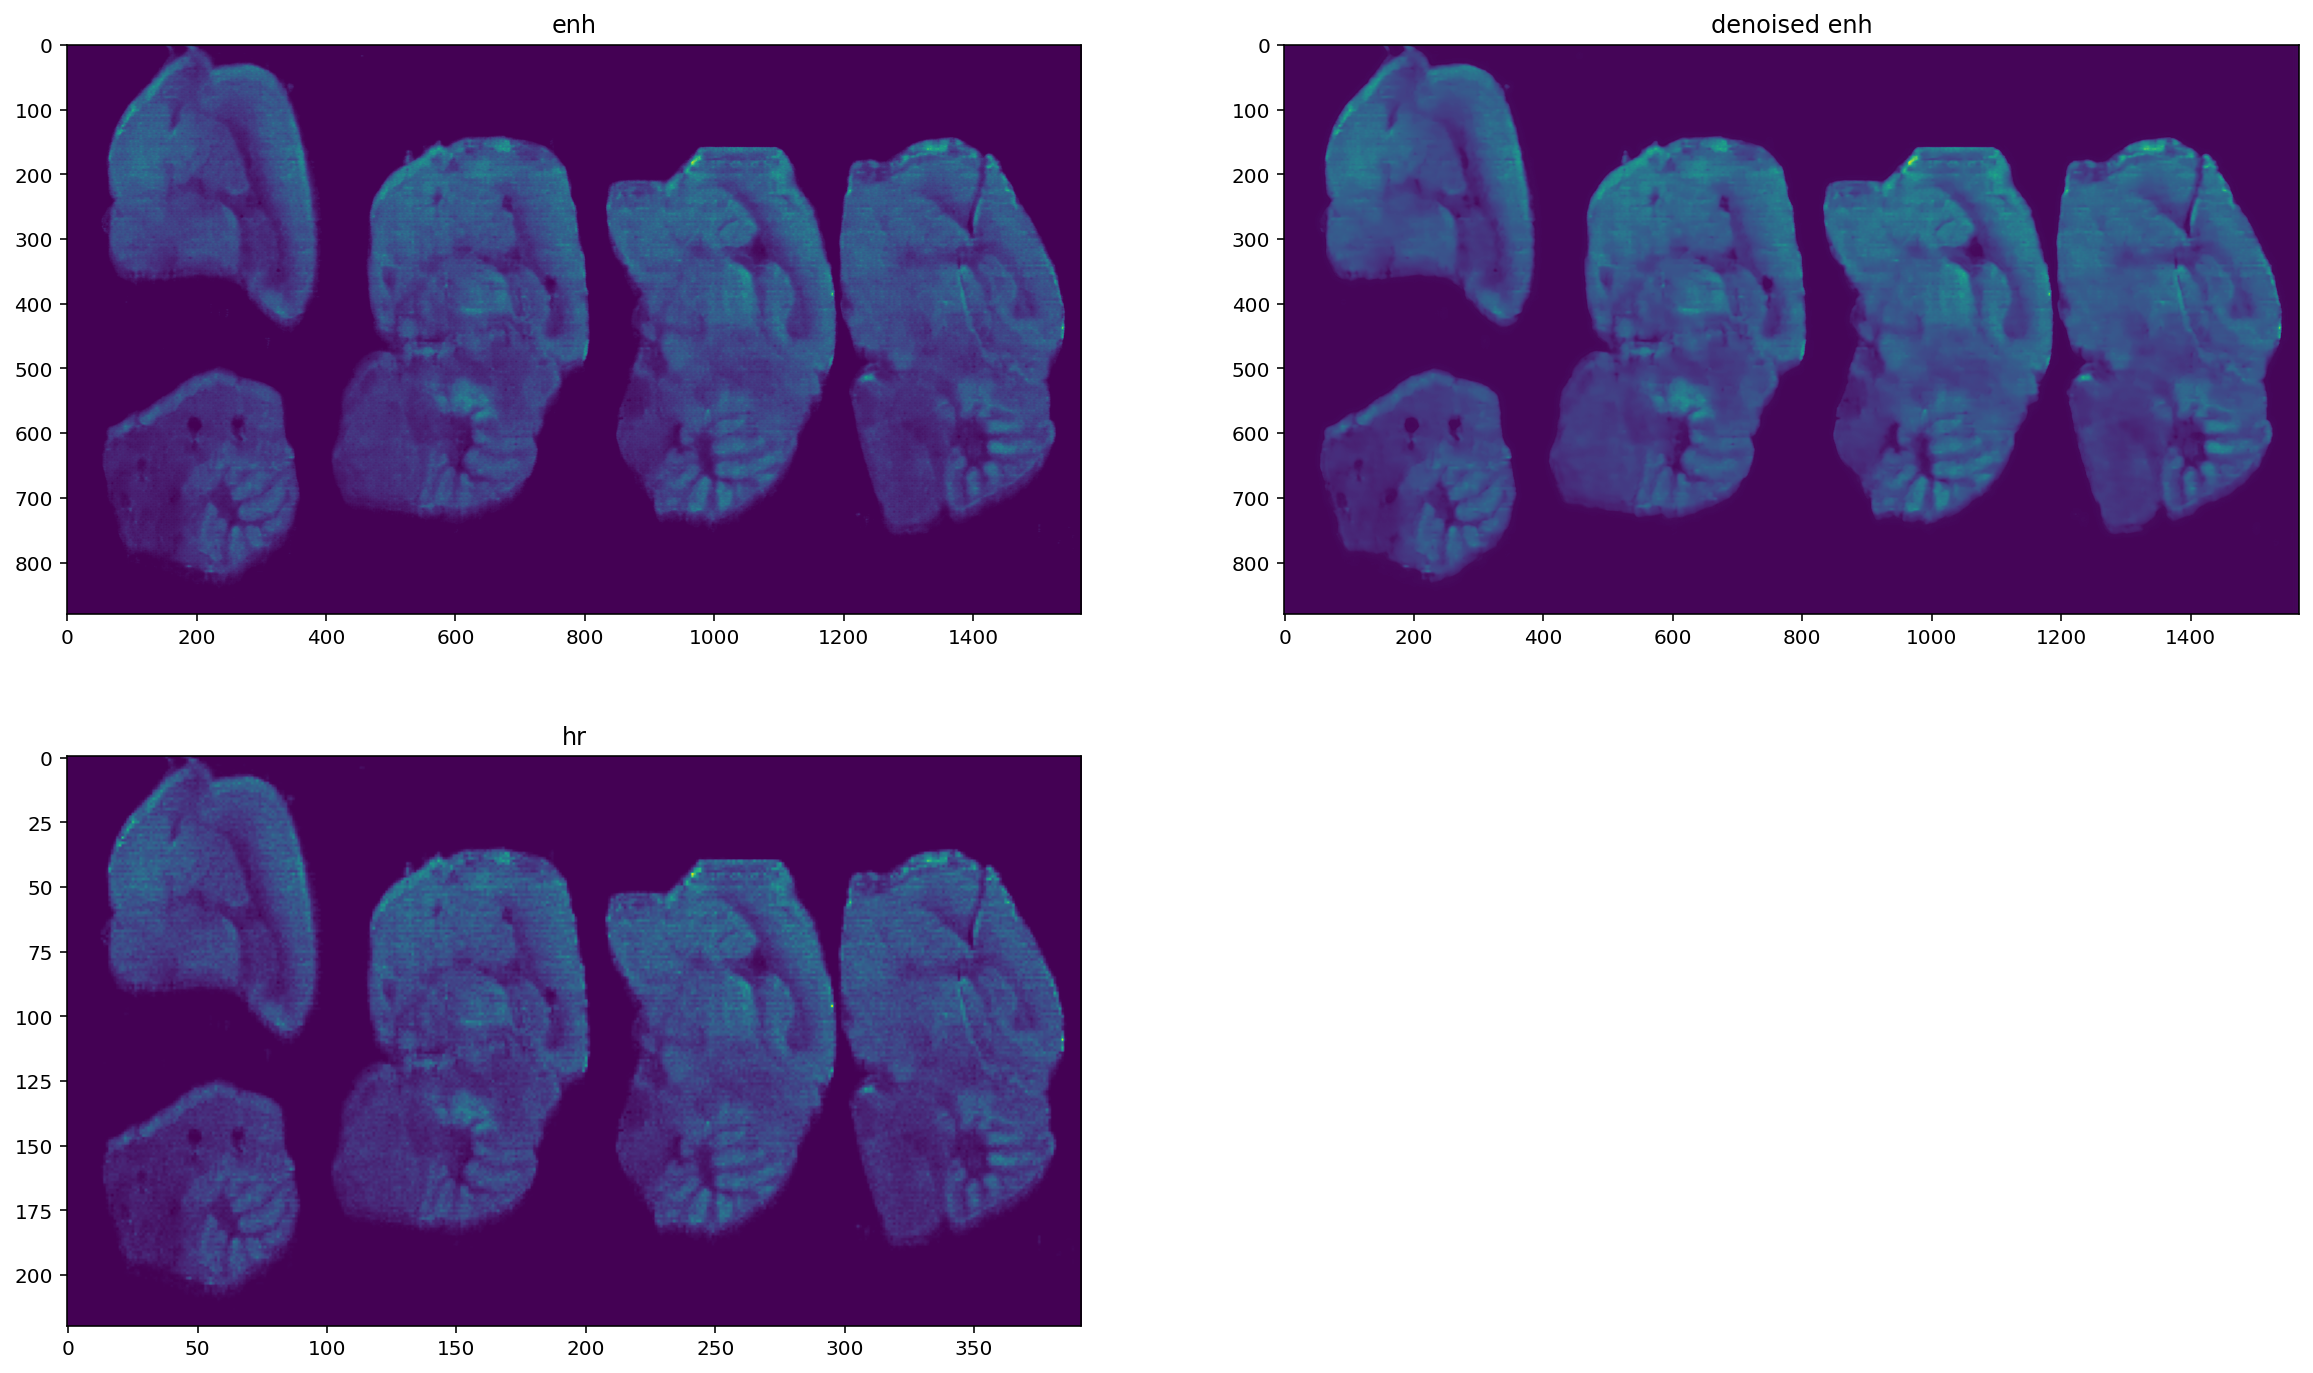

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.imshow(img[:,:])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[:,:])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[:,:])
plt.title('hr')

Text(0.5, 1.0, 'hr')

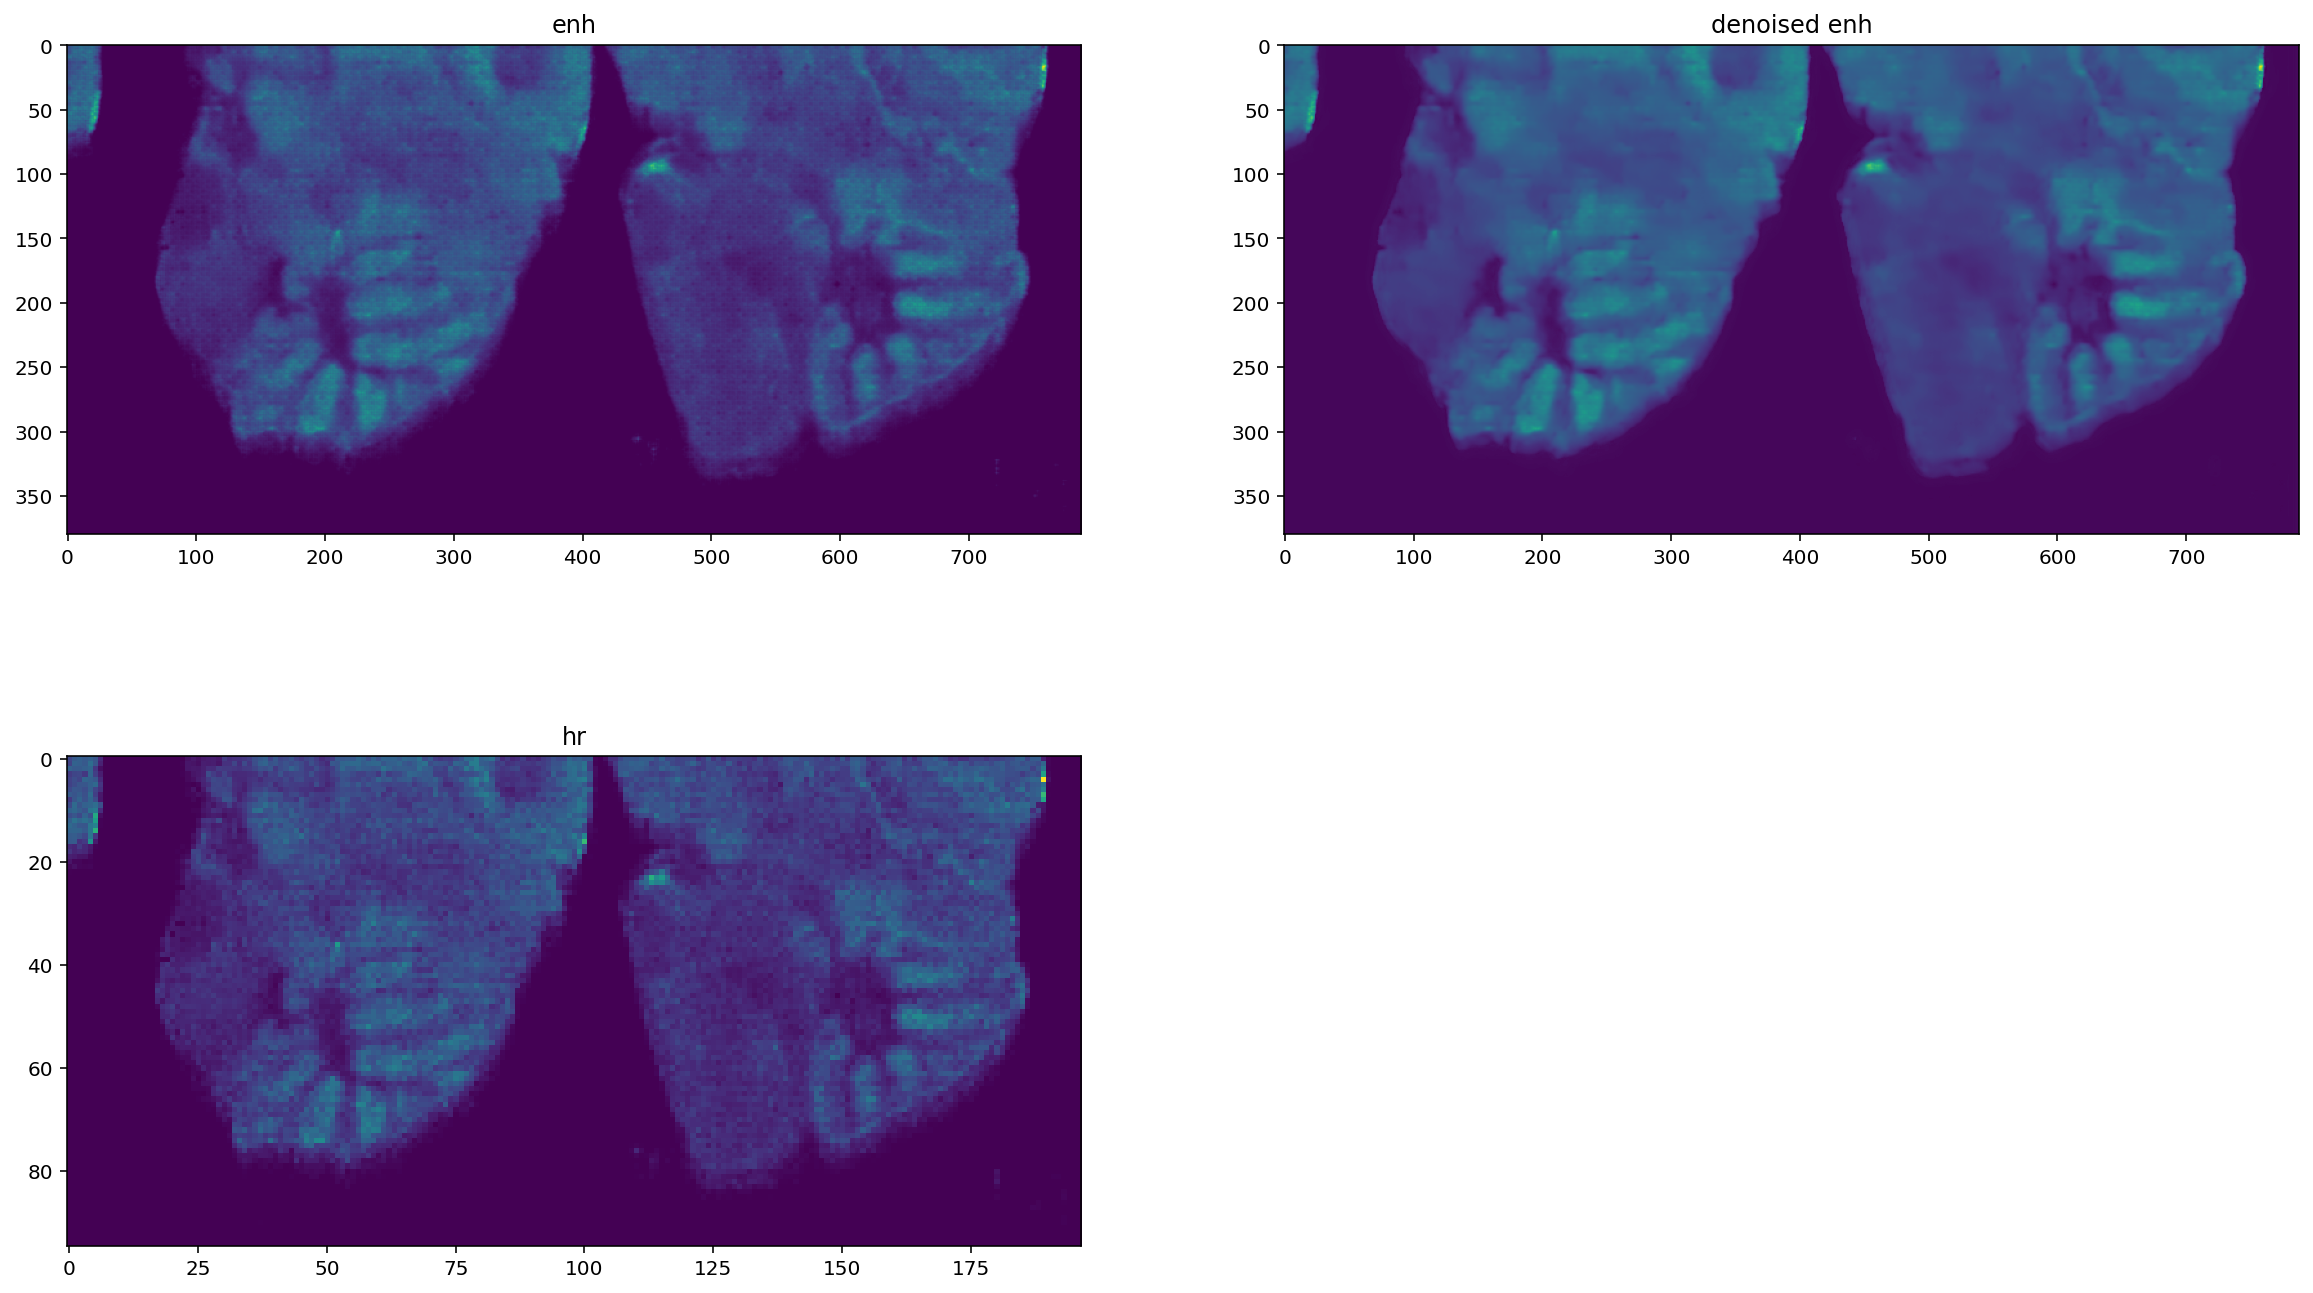

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.imshow(img[420:800,780:])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[420:800,780:])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[420//4:800//4,780//4:])
plt.title('hr')

Text(0.5, 1.0, 'hr')

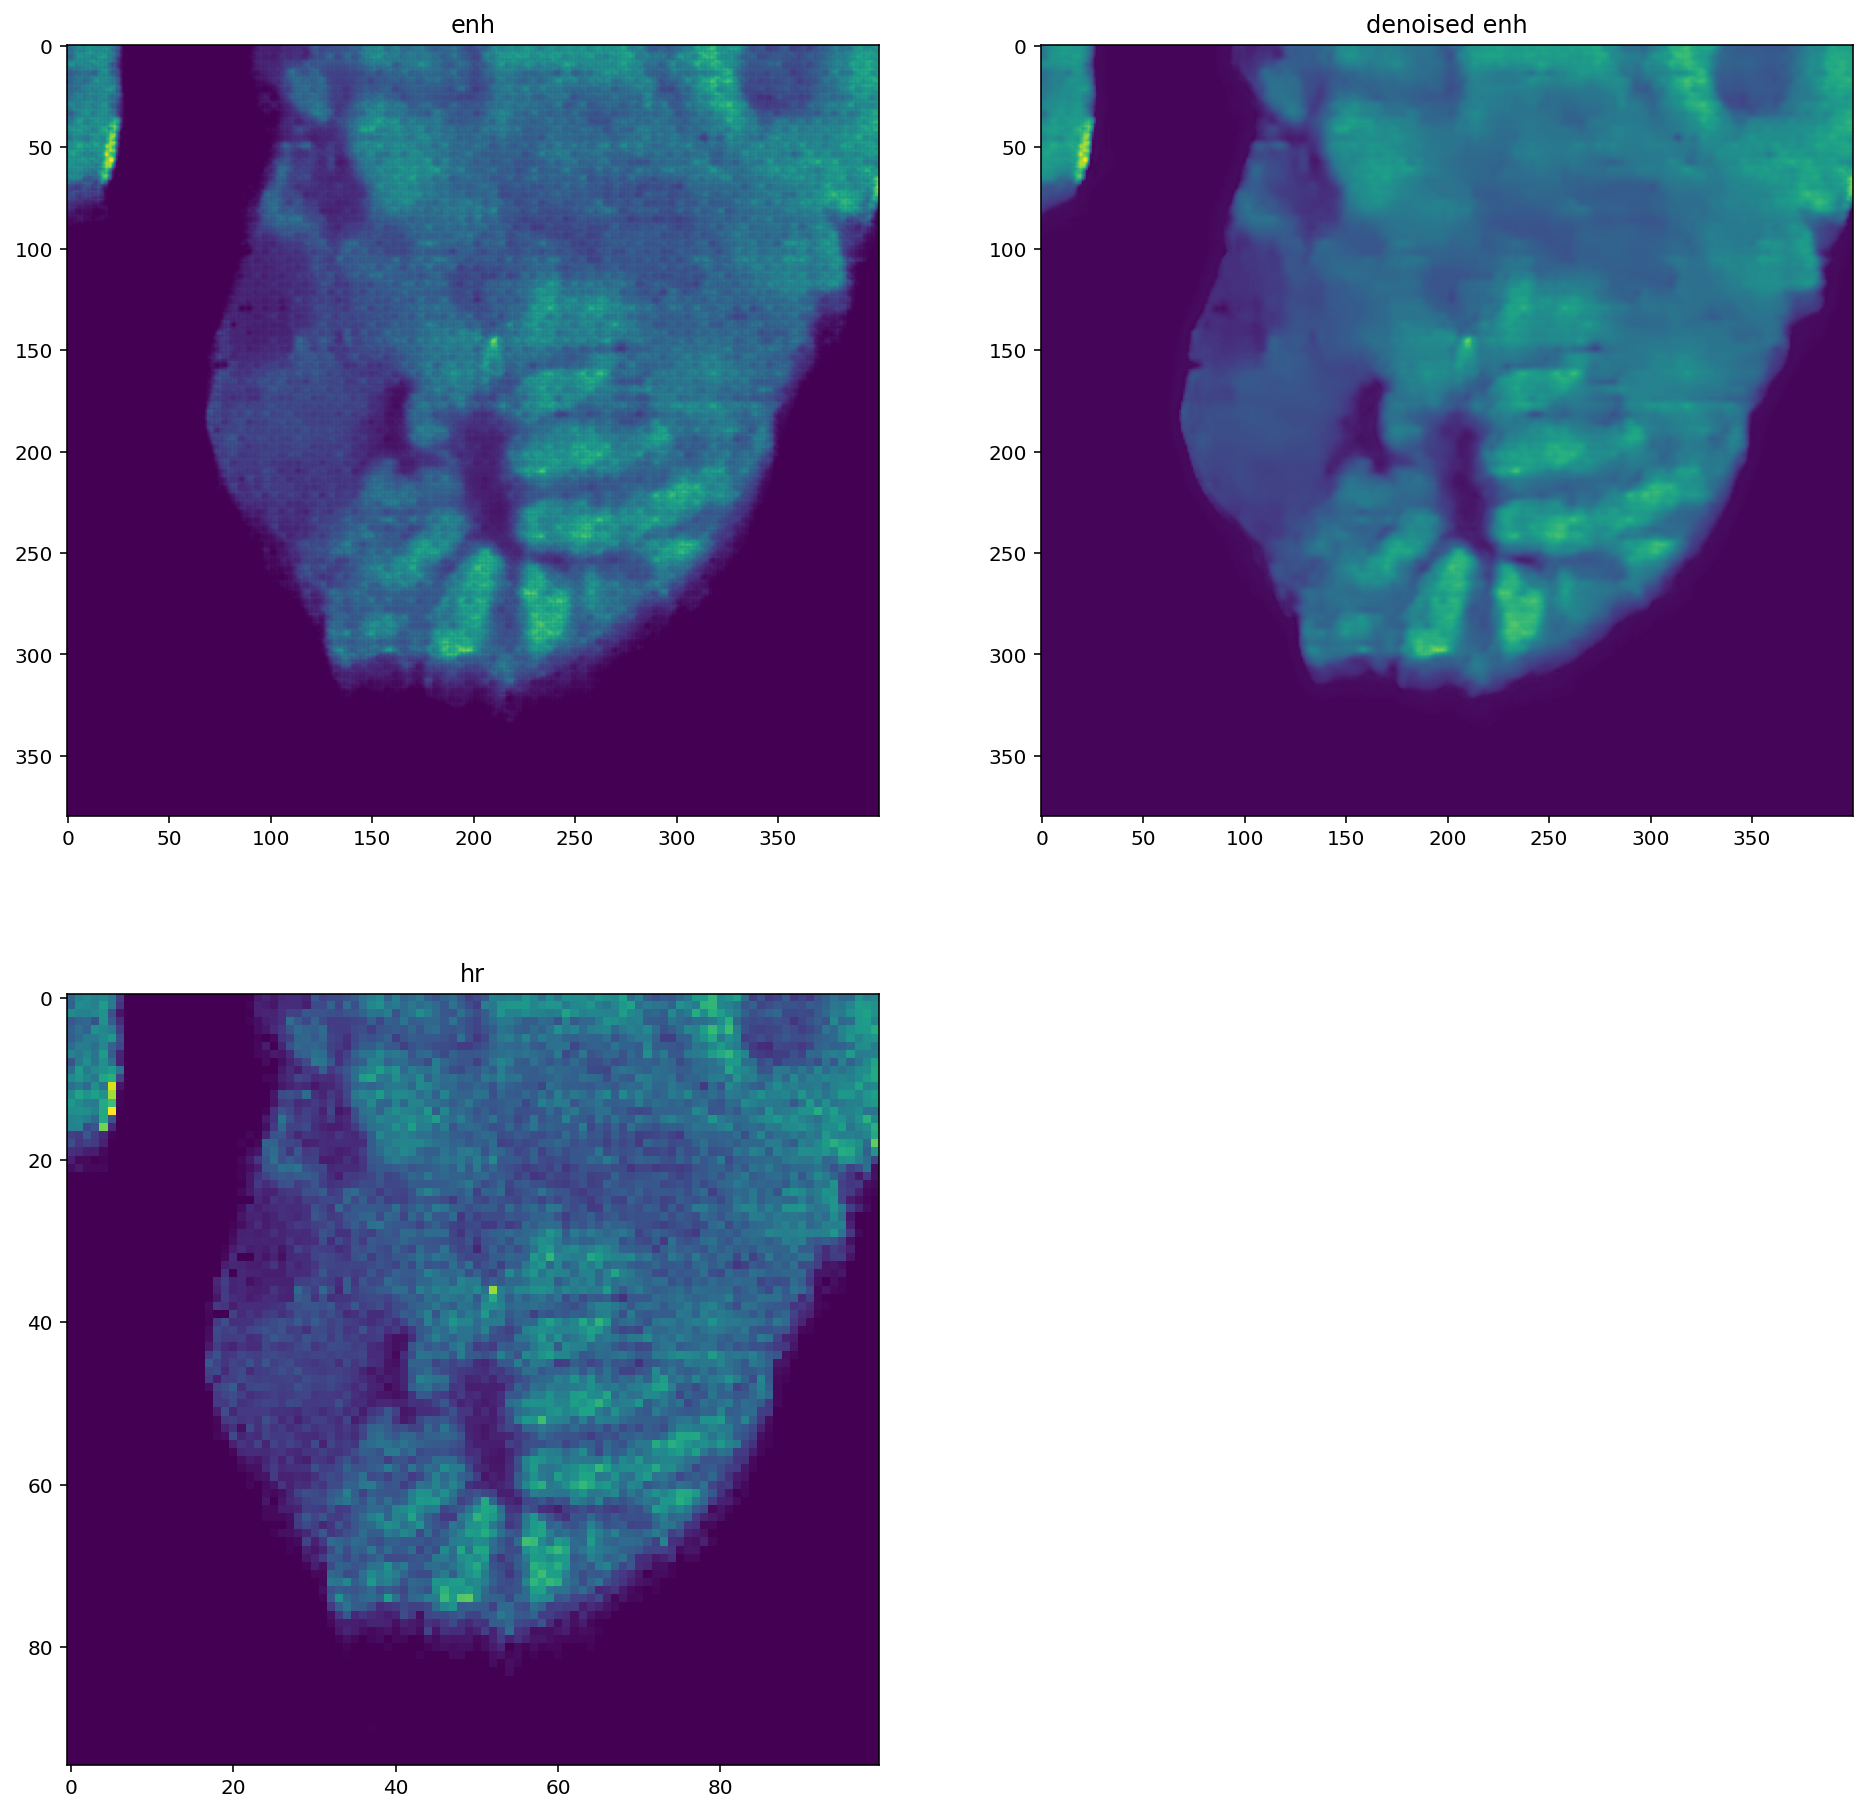

In [25]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img[420:800,780:1180])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[420:800,780:1180])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[420//4:800//4,780//4:1180//4])
plt.title('hr')

Text(0.5, 1.0, 'hr')

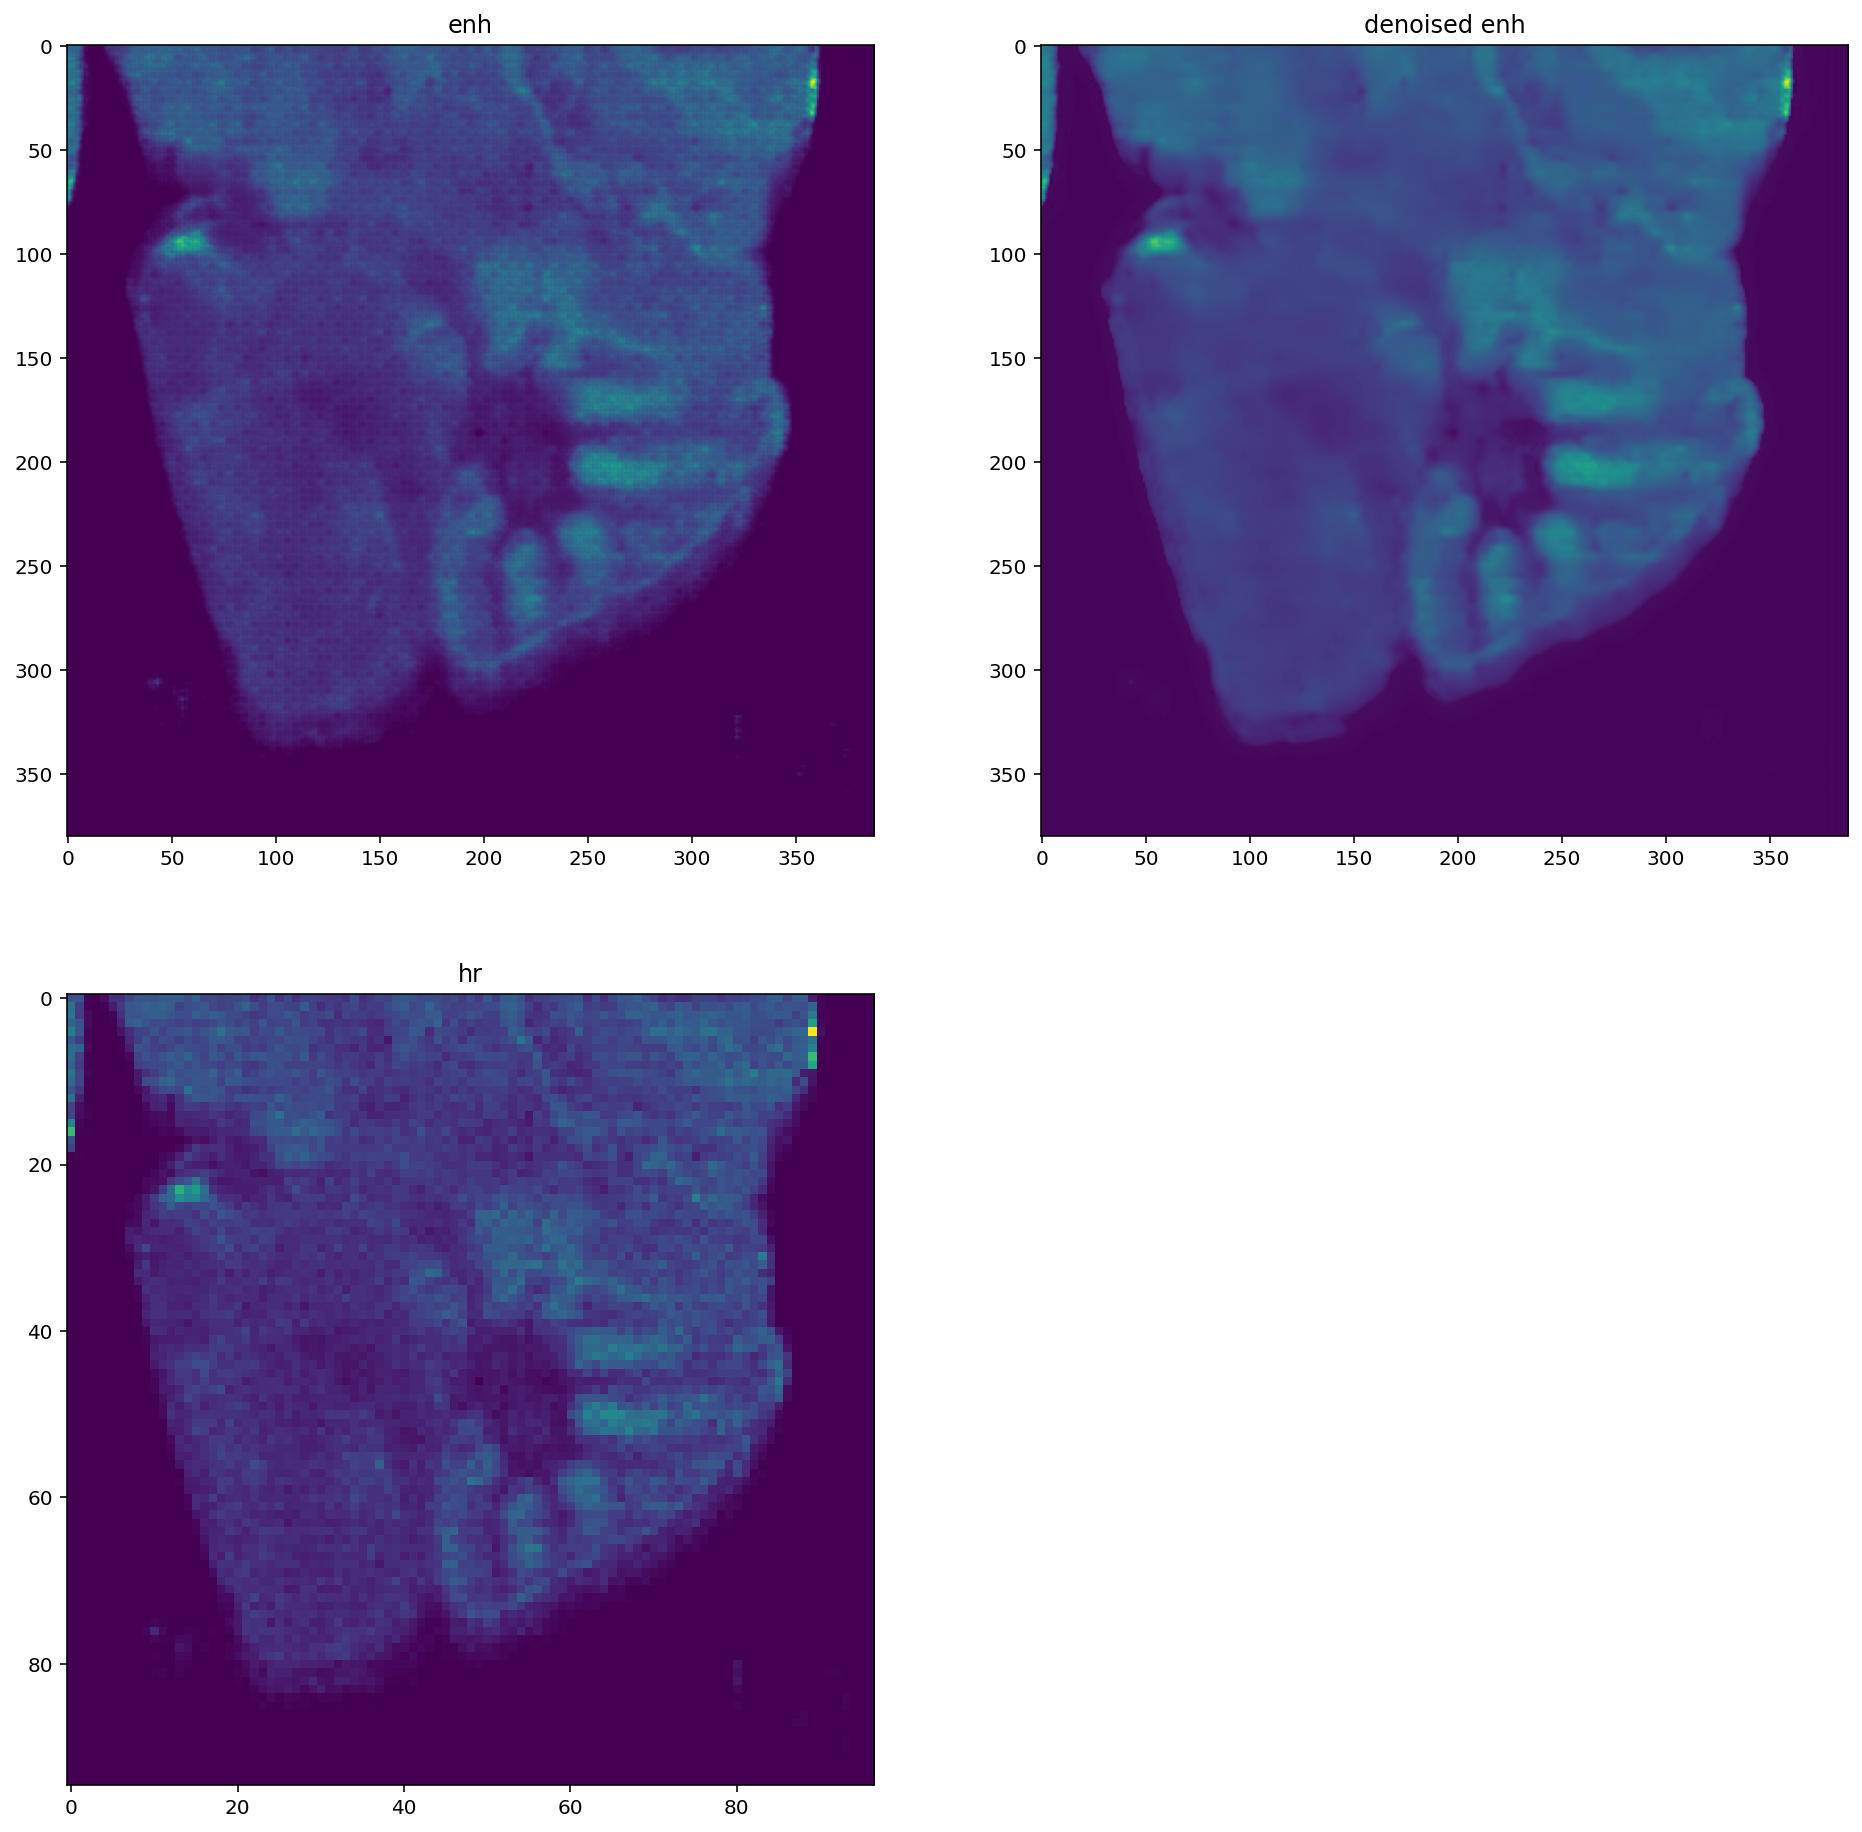

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img[420:800,1180:])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[420:800,1180:])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[420//4:800//4,1180//4:])
plt.title('hr')